/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


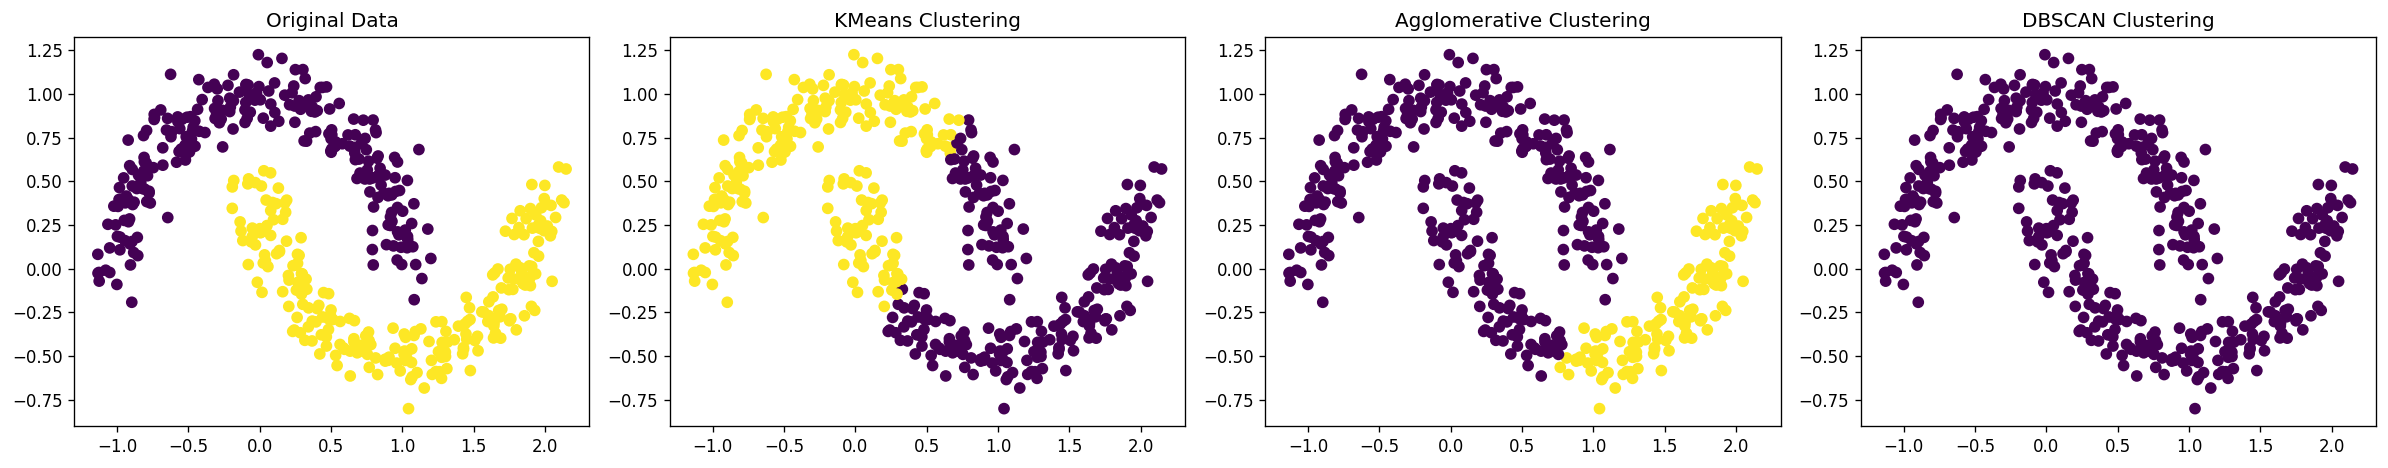

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# create moon-shaped data with two features
X, y = make_moons(n_samples=500, noise=0.1, random_state=0)

# create subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 4), dpi=120)

# plot original data
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_title('Original Data')

# KMeans clustering
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax[1].scatter(X[:, 0], X[:, 1], c=y_km)
ax[1].set_title('KMeans Clustering')

# Agglomerative clustering
ac = AgglomerativeClustering(n_clusters=2)
y_ac = ac.fit_predict(X)
ax[2].scatter(X[:, 0], X[:, 1], c=y_ac)
ax[2].set_title('Agglomerative Clustering')

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3)
y_dbscan = dbscan.fit_predict(X)
ax[3].scatter(X[:, 0], X[:, 1], c=y_dbscan)
ax[3].set_title('DBSCAN Clustering')

# display the plot
plt.tight_layout()
plt.show()


In [9]:
X.describe()

AttributeError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


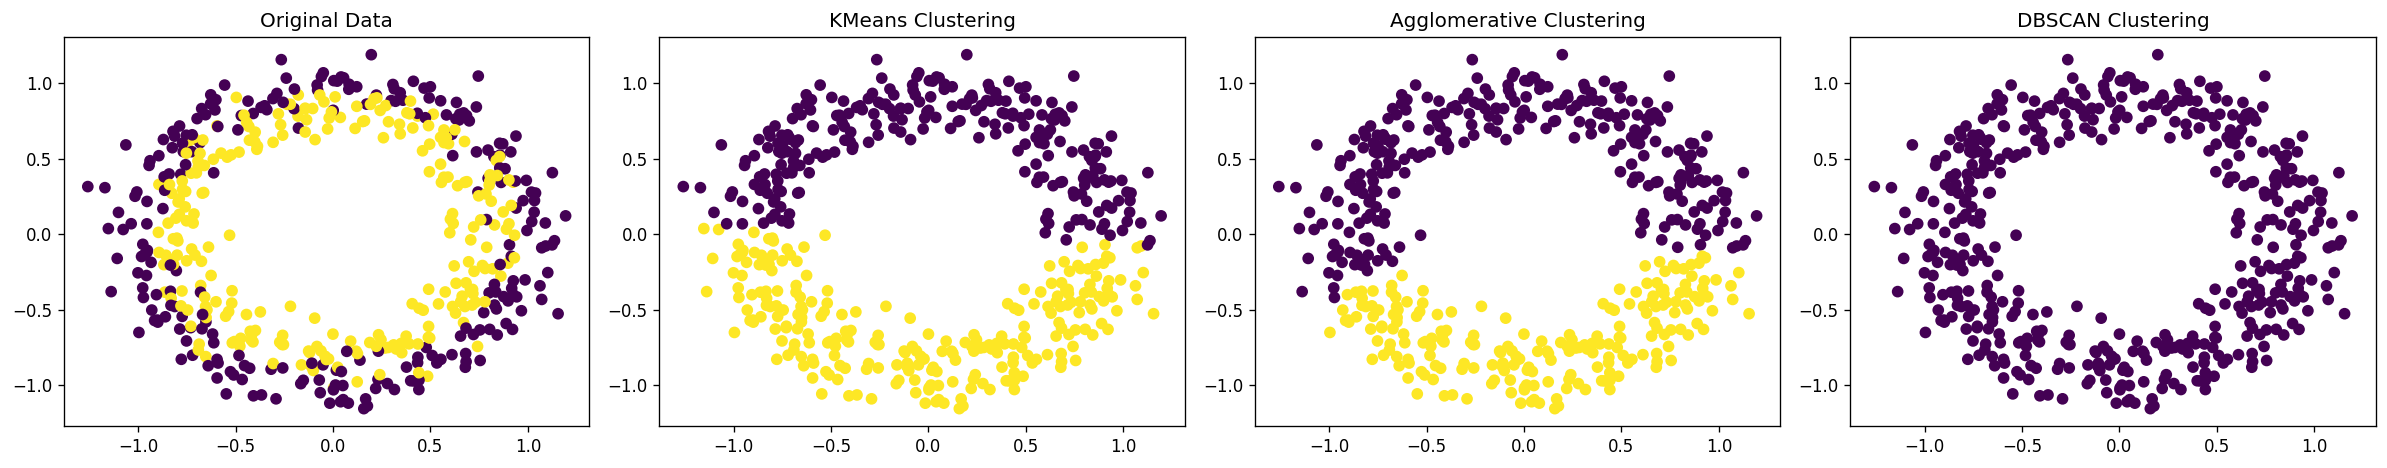

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# create moon-shaped data with two features
X, y = make_circles(n_samples=500, noise=0.1, random_state=0)

# create subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 4), dpi=120)

# plot original data
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_title('Original Data')

# KMeans clustering
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax[1].scatter(X[:, 0], X[:, 1], c=y_km)
ax[1].set_title('KMeans Clustering')

# Agglomerative clustering
ac = AgglomerativeClustering(n_clusters=2)
y_ac = ac.fit_predict(X)
ax[2].scatter(X[:, 0], X[:, 1], c=y_ac)
ax[2].set_title('Agglomerative Clustering')

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3)
y_dbscan = dbscan.fit_predict(X)
ax[3].scatter(X[:, 0], X[:, 1], c=y_dbscan)
ax[3].set_title('DBSCAN Clustering')

# display the plot
plt.tight_layout()
plt.show()


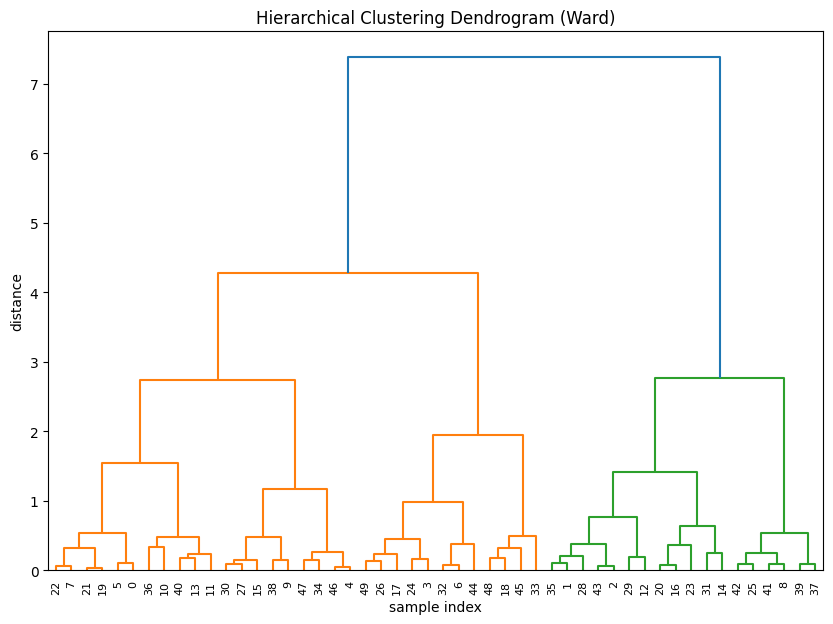

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# create moon-shaped data with two features
X, y = make_moons(n_samples=50, noise=0.1, random_state=0)

# Perform the hierarchical clustering with the 'ward' linkage method
linked = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()


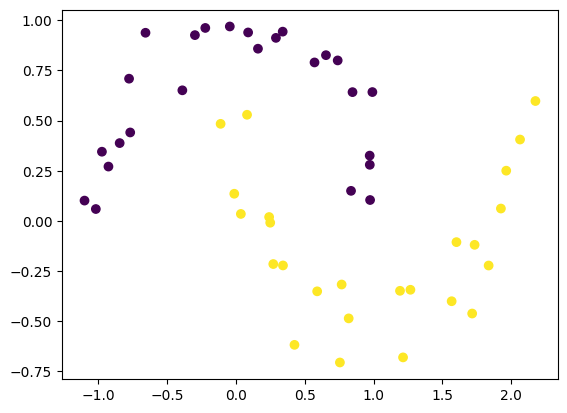

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)


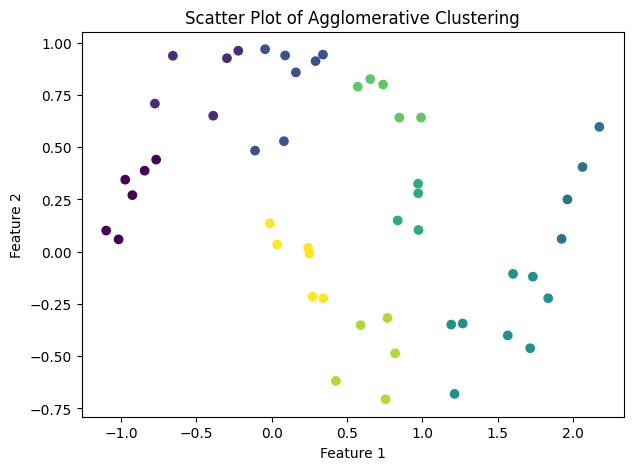

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# create moon-shaped data with two features
X, y = make_moons(n_samples=50, noise=0.1, random_state=0)

# Perform the hierarchical clustering with the 'ward' linkage method
linked = linkage(X, 'ward')

# set the threshold to form flat clusters
fclust_labels = fcluster(linked, 1, criterion='distance') # adjust threshold value as needed

# scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=fclust_labels)
plt.title('Scatter Plot of Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


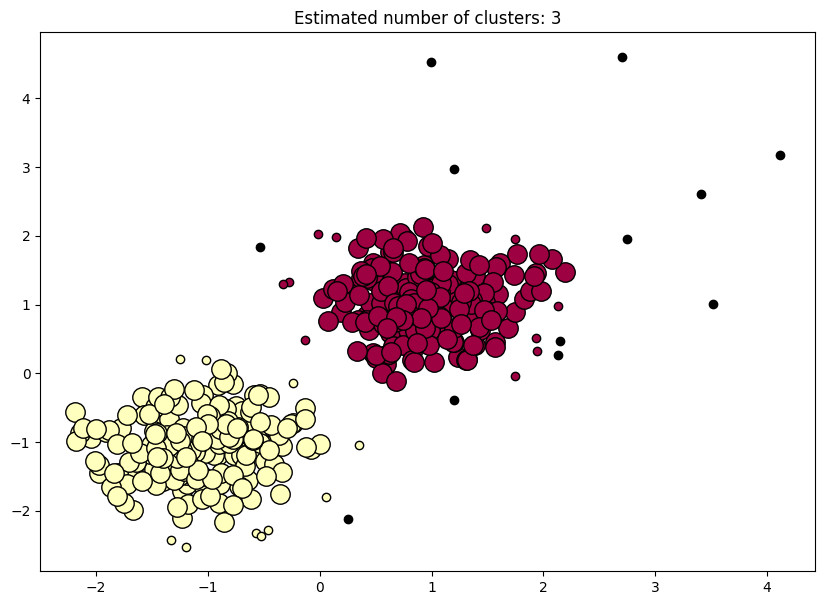

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN

# Create three blobs. Two of them will form our clusters, and the third one will be noise.
X, _ = make_blobs(n_samples=[200,200,10], centers=[[1,1], [-1,-1], [2,2]], cluster_std=[0.5, 0.5, 1.5], random_state=0)

# Perform DBSCAN on the data
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X)

# Let's identify core samples, border points and outliers
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Black used for noise (outliers).
unique_labels = set(dbscan.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 7))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan.labels_ == k)

    # plot core points
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    # plot border points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % len(unique_labels))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


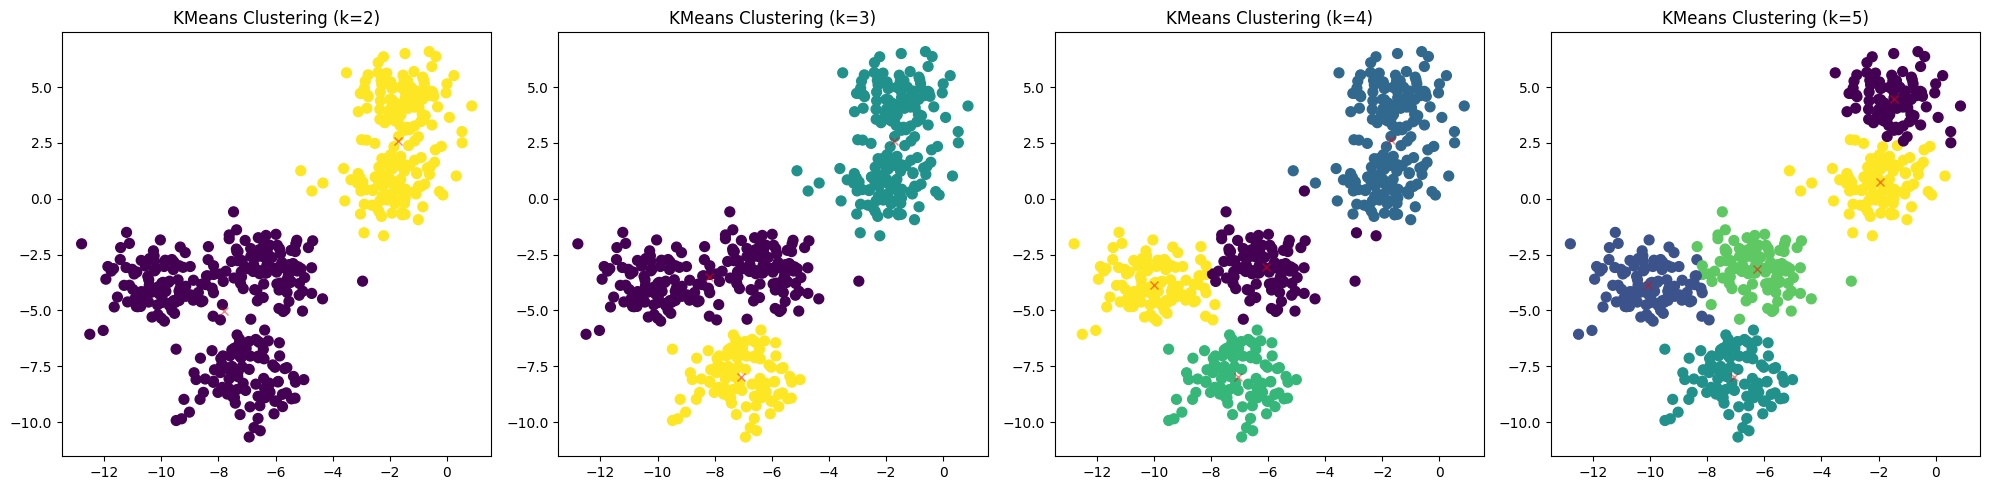

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic dataset with 5 blobs (clusters)
X, y = make_blobs(n_samples=500, centers=5, random_state=1)

plt.figure(figsize=(20, 5))

for i, k in enumerate([2, 3, 4, 5], 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)

    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_

    plt.subplot(1, 4, i)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.plot(centers[:, 0], centers[:, 1],  'x',c='red', alpha=0.5)
    plt.title(f'KMeans Clustering (k={k})')

plt.tight_layout()
plt.show()


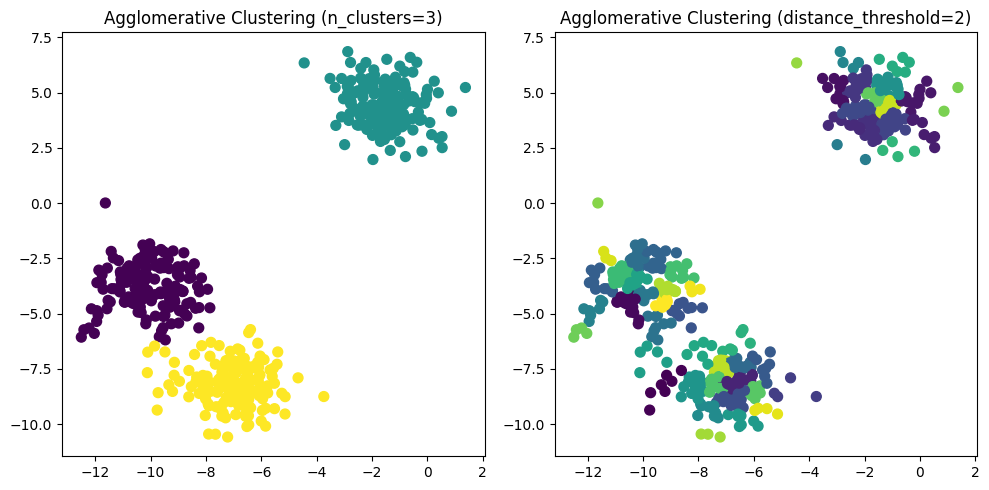

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Generate synthetic dataset with 3 blobs (clusters)
X, y = make_blobs(n_samples=500, centers=3, random_state=1)

# Method 1: specify the number of clusters
agg_clust1 = AgglomerativeClustering(n_clusters=3)
agg_clust1.fit(X)
y_agg1 = agg_clust1.labels_

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_agg1, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (n_clusters=3)')

# Method 2: specify the distance threshold
agg_clust2 = AgglomerativeClustering(n_clusters=None, distance_threshold=2)
agg_clust2.fit(X)
y_agg2 = agg_clust2.labels_

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_agg2, s=50, cmap='viridis')
plt.title('Agglomerative Clustering (distance_threshold=2)')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

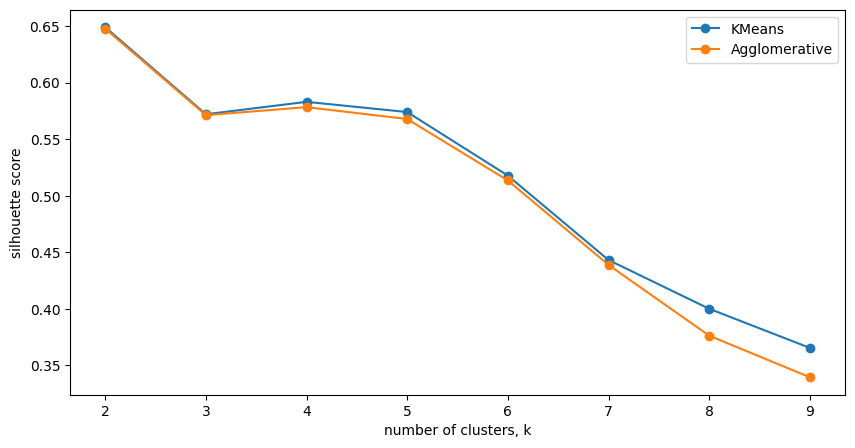

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic dataset with 5 blobs (clusters)
X, y = make_blobs(n_samples=500, centers=3, random_state=1)

k_values = range(2, 10)
kmeans_scores = []
agg_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    agg = AgglomerativeClustering(n_clusters=k).fit(X)
    
    kmeans_score = silhouette_score(X, kmeans.labels_)
    agg_score = silhouette_score(X, agg.labels_)
    
    kmeans_scores.append(kmeans_score)
    agg_scores.append(agg_score)

# plot the scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, kmeans_scores, '-o', label='KMeans')
plt.plot(k_values, agg_scores, '-o', label='Agglomerative')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

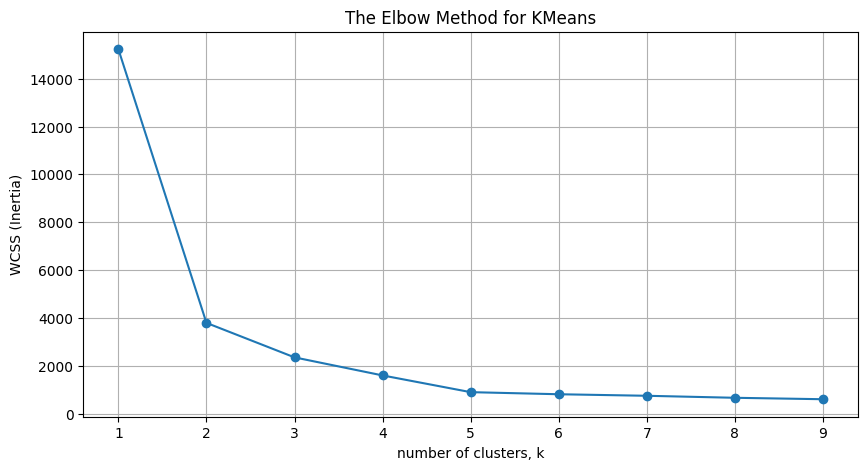

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic dataset with 5 blobs (clusters)
X, y = make_blobs(n_samples=500, centers=5, random_state=1)

k_values = range(1, 10)
kmeans_wcss = []  # Within-Cluster-Sum-of-Squares (WCSS)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    # Compute the WCSS for KMeans
    kmeans_wcss.append(kmeans.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

# plot the scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, kmeans_wcss, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('WCSS (Inertia)')
plt.title('The Elbow Method for KMeans')
plt.grid(True)
plt.show()
